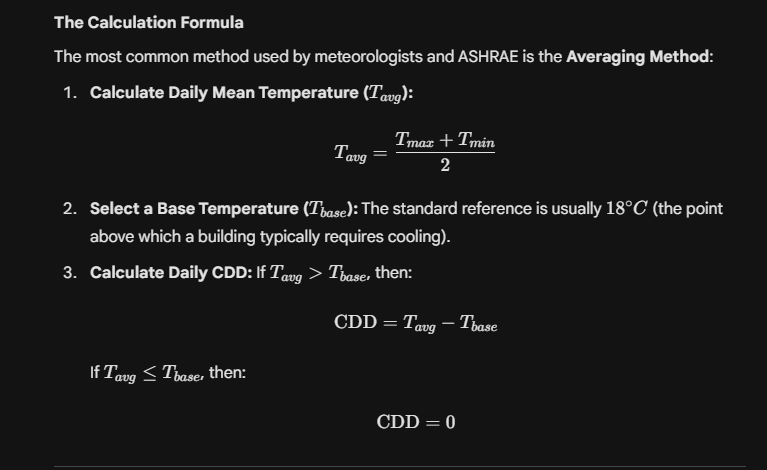

In [1]:
import pandas as pd

In [2]:
df_bandarban = pd.read_csv('../1980-2024-dataset/Bandarban_historical_weather_1980_2024.csv')

In [3]:
desired_colmn = ['day', 'month', 'year', 'max_temperature(degree C)', 'minimum_temperature(degree C)']
HI_df_Bandarban = df_bandarban[desired_colmn]

HI_df_Bandarban.head()

,day,month,year,max_temperature(degree C),minimum_temperature(degree C)
0,1,1,1980,0.0,0.0
1,2,1,1980,0.0,0.0
2,3,1,1980,0.0,0.0
3,4,1,1980,0.0,0.0
4,5,1,1980,0.0,0.0


In [9]:
with_no_null_HI = HI_df_Bandarban.dropna()
# drop zeroes
with_no_null_HI = with_no_null_HI[(with_no_null_HI['max_temperature(degree C)'] != 0) & (with_no_null_HI['minimum_temperature(degree C)'] != 0)]

print(f"After removing missing values from Bandarban, dataset contains {with_no_null_HI.shape[0]} rows and {with_no_null_HI.shape[1]} columns out of {df_bandarban.shape[0]} rows.")
with_no_null_HI.head()

After removing missing values from Bandarban, dataset contains 14763 rows and 5 columns out of 16437 rows.


,day,month,year,max_temperature(degree C),minimum_temperature(degree C)
6,7,1,1980,6.1,6.1
386,21,1,1981,17.6,17.6
731,1,1,1982,17.1,17.1
732,2,1,1982,13.1,0.1
733,3,1,1982,24.1,24.1


In [10]:

zeros_per_col = (with_no_null_HI == 0).sum()
zeros_df = zeros_per_col.to_frame(name='zero_count')
zeros_df['zero_percentage'] = (zeros_df['zero_count'] / len(with_no_null_HI) * 100).round(2)
zeros_df = zeros_df[zeros_df['zero_count'] > 0].sort_values('zero_count', ascending=False)

print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)


Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


In [ ]:
desired_colmn = ['day', 'month', 'year', 'max_temperature(degree C)', 'minimum_temperature(degree C)']
HI_df_Bandarban = df_bandarban[desired_colmn]

with_no_null_HI.head()

,day,month,year,max_temperature(degree C),minimum_temperature(degree C)
6,7,1,1980,6.1,6.1
386,21,1,1981,17.6,17.6
387,22,1,1981,NaN,NaN
388,23,1,1981,NaN,NaN
389,24,1,1981,NaN,NaN


In [16]:
with_no_null_HI = HI_df_Bandarban.dropna()
with_no_null_HI = HI_df_Bandarban[(HI_df_Bandarban['max_temperature(degree C)'] != 0) & (HI_df_Bandarban['minimum_temperature(degree C)'] != 0)]

print(f"After removing missing values from Bandarban, dataset contains {with_no_null_HI.shape[0]} rows and {with_no_null_HI.shape[1]} columns out of {df_bandarban.shape[0]} rows.")
with_no_null_HI.head()

After removing missing values from Bandarban, dataset contains 16051 rows and 5 columns out of 16437 rows.


,day,month,year,max_temperature(degree C),minimum_temperature(degree C)
6,7,1,1980,6.1,6.1
386,21,1,1981,17.6,17.6
387,22,1,1981,NaN,NaN
388,23,1,1981,NaN,NaN
389,24,1,1981,NaN,NaN


In [17]:

zeros_per_col = (with_no_null_HI == 0).sum()
zeros_df = zeros_per_col.to_frame(name='zero_count')
zeros_df['zero_percentage'] = (zeros_df['zero_count'] / len(with_no_null_HI) * 100).round(2)
zeros_df = zeros_df[zeros_df['zero_count'] > 0].sort_values('zero_count', ascending=False)

print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)


Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


Date range: 1980-01-07 to 2024-12-31


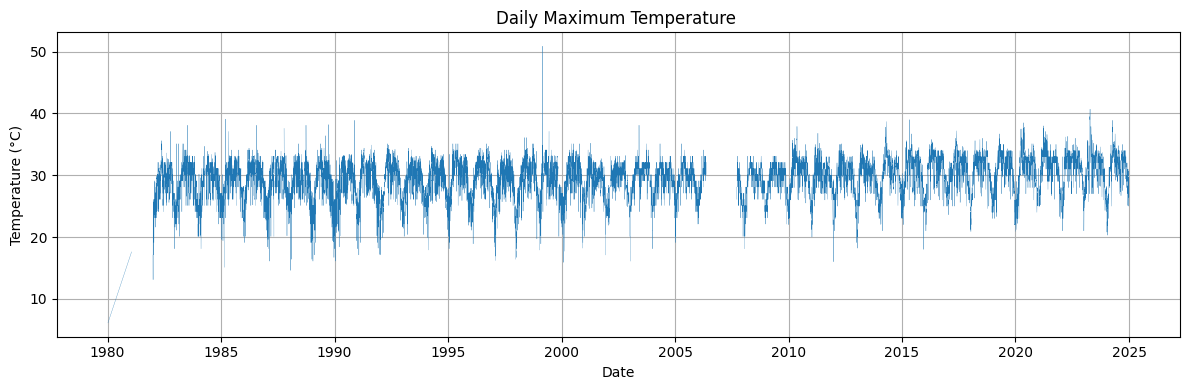

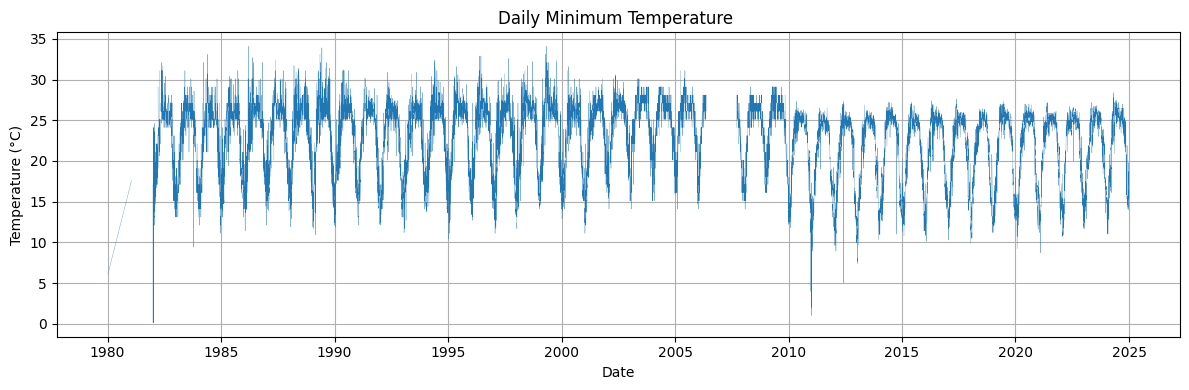

In [19]:
import matplotlib.pyplot as plt

# ensure a datetime column exists
if 'date' not in with_no_null_HI.columns:
    with_no_null_HI['date'] = pd.to_datetime(with_no_null_HI[['year', 'month', 'day']])

# show date range
min_date = with_no_null_HI['date'].min()
max_date = with_no_null_HI['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# plot daily temperature time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['max_temperature(degree C)'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Maximum Temperature ')
plt.grid(True)
plt.tight_layout()
plt.show()

# plot dew point time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['minimum_temperature(degree C)'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Minimum Temperature ')
plt.grid(True)
plt.tight_layout()
plt.show()

